<a href="https://colab.research.google.com/github/eamaciejewski/Poisson-Gap/blob/master/PartClassification_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounts our google drive to access the part images

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import keras
import tensorflow
import numpy as np
import os
import shutil

In [0]:
resolution = 150

In [0]:
# Extracts the accepted and defective part files

!unzip "/content/drive/My Drive/Colab Notebooks/Accepted_Pieces.zip"
!unzip "/content/drive/My Drive/Colab Notebooks/contamination.zip"

In [0]:
# Creates a folder of the unsorted original data and removes unnecessary information
!rm -R contamination/Misc

!mkdir original_data
!mv contamination original_data
!mv Accepted_Pieces original_data

In [0]:
# Make images have uniform names

import os

contamination = 'original_data/contamination/'
contamination_contents = os.listdir(contamination)
contamination_contents = [contamination + image for image in contamination_contents]

accepted = 'original_data/Accepted_Pieces/'
accepted_contents = os.listdir(accepted)
accepted_contents = [accepted + image for image in accepted_contents]

count = 1
for image in contamination_contents:
  os.rename(image, contamination + 'contamination.' + str(count) + '.jpg')
  count += 1

count = 1
for image in accepted_contents:
  os.rename(image, accepted + 'accepted.' + str(count) + '.jpg')
  count += 1

In [15]:
# Randomly split dataset into train, test, and validation
# For defective and non-defective parts
# With numpy random seed consistent, the input data will be split in the same way each time

np.random.seed(42)

original_dataset_accepted = "original_data/Accepted_Pieces"
original_dataset_contaminated = "original_data/contamination"

contamination_image_names = os.listdir(original_dataset_contaminated)
contamination_indices = np.array(list(range(len(contamination_image_names))))
np.random.shuffle(contamination_indices)

accepted_image_names = os.listdir(original_dataset_accepted)
accepted_indices = np.array(list(range(len(accepted_image_names))))
np.random.shuffle(accepted_indices)

!rm -rf classify_parts
base_dir = "classify_parts"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_contamination_dir = os.path.join(train_dir, 'contamination')
os.mkdir(train_contamination_dir)
validation_contamination_dir = os.path.join(validation_dir, 'contamination')
os.mkdir(validation_contamination_dir)
test_contamination_dir = os.path.join(test_dir, 'contamination')
os.mkdir(test_contamination_dir)

train_accepted_dir = os.path.join(train_dir, 'accepted')
os.mkdir(train_accepted_dir)
validation_accepted_dir = os.path.join(validation_dir, 'accepted')
os.mkdir(validation_accepted_dir)
test_accepted_dir = os.path.join(test_dir, 'accepted')
os.mkdir(test_accepted_dir)

train_end = int(len(contamination_indices)/2)
validation_end = train_end + int(len(contamination_indices)/4)

seen = []
for i in range(train_end):
  src = os.path.join(original_dataset_contaminated, contamination_image_names[contamination_indices[i]])
  dst = os.path.join(train_contamination_dir, contamination_image_names[contamination_indices[i]])
  shutil.copyfile(src, dst)
  seen.append(contamination_indices[i])

for i in range(train_end, validation_end):
  src = os.path.join(original_dataset_contaminated, contamination_image_names[contamination_indices[i]])
  dst = os.path.join(validation_contamination_dir, contamination_image_names[contamination_indices[i]])
  shutil.copyfile(src, dst)
  seen.append(contamination_indices[i])

for i in range(validation_end, len(contamination_indices)):
  src = os.path.join(original_dataset_contaminated, contamination_image_names[contamination_indices[i]])
  dst = os.path.join(test_contamination_dir, contamination_image_names[contamination_indices[i]])
  shutil.copyfile(src, dst)
  seen.append(contamination_indices[i])

train_end = int(len(accepted_indices)/2)
validation_end = train_end + int(len(accepted_indices)/4)

seen = []
for i in range(train_end):
  src = os.path.join(original_dataset_accepted, accepted_image_names[accepted_indices[i]])
  dst = os.path.join(train_accepted_dir, accepted_image_names[accepted_indices[i]])
  shutil.copyfile(src, dst)
  seen.append(accepted_indices[i])

for i in range(train_end, validation_end):
  src = os.path.join(original_dataset_accepted, accepted_image_names[accepted_indices[i]])
  dst = os.path.join(validation_accepted_dir, accepted_image_names[accepted_indices[i]])
  shutil.copyfile(src, dst)
  seen.append(accepted_indices[i])

for i in range(validation_end, len(accepted_indices)):
  src = os.path.join(original_dataset_accepted, accepted_image_names[accepted_indices[i]])
  dst = os.path.join(test_accepted_dir, accepted_image_names[accepted_indices[i]])
  shutil.copyfile(src, dst)
  seen.append(accepted_indices[i])

print(seen)
print(len(seen))
print(len(set(seen)))

[309, 139, 15, 279, 88, 398, 304, 107, 59, 188, 168, 136, 70, 96, 337, 260, 206, 318, 76, 342, 197, 334, 123, 321, 187, 355, 399, 374, 470, 303, 233, 312, 115, 127, 152, 261, 381, 242, 156, 430, 439, 23, 30, 129, 10, 361, 268, 213, 423, 317, 138, 134, 158, 484, 448, 414, 124, 218, 243, 298, 247, 314, 480, 280, 485, 39, 290, 245, 479, 66, 266, 67, 446, 422, 149, 175, 324, 287, 450, 207, 363, 217, 63, 14, 183, 17, 344, 308, 362, 235, 253, 405, 221, 1, 87, 126, 86, 357, 157, 299, 262, 319, 119, 174, 307, 246, 244, 358, 432, 370, 170, 454, 47, 256, 106, 93, 55, 154, 254, 198, 120, 25, 72, 270, 44, 130, 259, 48, 249, 475, 286, 199, 391, 348, 21, 215, 210, 458, 20, 171, 288, 60, 457, 431, 388, 325, 103, 359, 289, 294, 203, 209, 310, 421, 110, 453, 472, 327, 230, 265, 275, 451, 413, 16, 365, 194, 137, 343, 353, 295, 80, 240, 105, 179, 408, 184, 404, 460, 78, 29, 269, 441, 377, 37, 165, 102, 481, 447, 65, 141, 224, 465, 466, 111, 225, 456, 236, 296, 373, 293, 49, 122, 371, 117, 351, 161, 153, 

In [0]:
base_dir = "classify_parts"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_contamination_dir = os.path.join(train_dir, 'contamination')
validation_contamination_dir = os.path.join(validation_dir, 'contamination')
test_contamination_dir = os.path.join(test_dir, 'contamination')
train_accepted_dir = os.path.join(train_dir, 'accepted')
validation_accepted_dir = os.path.join(validation_dir, 'accepted')
test_accepted_dir = os.path.join(test_dir, 'accepted')

In [0]:
# Setting up a data augmentation configuration via ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

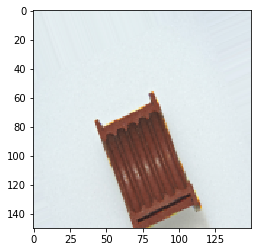

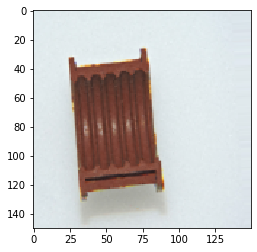

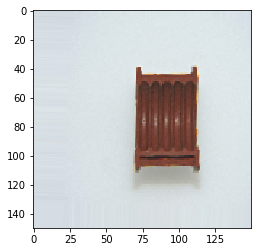

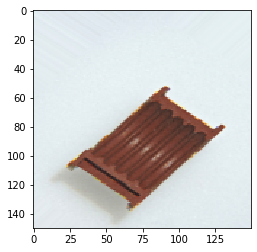

In [26]:
# Displaying some randomly augmented training images

from keras.preprocessing import image
import os
import matplotlib.pyplot as plt

fnames = [os.path.join(train_contamination_dir, fname) for
fname in os.listdir(train_contamination_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(resolution, resolution))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
# Defining a new convnet that includes dropout

from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(resolution, resolution, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

In [0]:
#  Training the convnet using data-augmentation generators

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(resolution, resolution),
    batch_size=32,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(resolution, resolution),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=17,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4)

In [0]:
#  Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Get test accuracy

test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(resolution, resolution),
  batch_size=20,
  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [0]:
# Save the model and history variable 
# model2 = data_augmentation

import pickle

model.save('model_data_augmentation_' + str(resolution) + '.h5')

with open('history_model_data_augmentation.pkl', 'wb') as f:
  pickle.dump(history, f)

In [0]:
# Load the variables

import pickle

f = open('history_model_data_augmentation_' + str(resolution) + '.pkl', 'rb')
print(f)
history = pickle.load(f)
print(history)